<a href="https://colab.research.google.com/github/pablomosque/Curso2/blob/master/Ejercicio_S4C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Clipping
**Ejercicio**: Entrene una red neuronal en keras para el dataset de Iris con 3 capas ocultas de 4 neuronas cada una con funciones de activación sigmoide. Use gradiente estocástico con **gradient clipping**

In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD #Importar el optimizador
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))

In [ ]:
optim=SGD(clipnorm=1)
modelo.compile(optim,loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=200)

Epoch 1/200
15/15 [==============================] - 2s 3ms/step - loss: 1.1119 - accuracy: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1081 - accuracy: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1037 - accuracy: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 1.1003 - accuracy: 0.3333
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0980 - accuracy: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.3733
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0942 - accuracy: 0.3400
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0924 - accuracy: 0.3333
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.3333
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0901 - accuracy: 0.3800
Epoch 11/

#Funciones de Activación

**Ejercicio**: Entrene una red neuronal en keras para el dataset de Iris con 3 capas ocultas de 4 neuronas cada una con funciones de activación **ReLu**, **PReLU** y **SELU** respectivamente. Cuantos parámetros tendrá cada capa?

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,PReLU,ReLU #Puedo importar las funciones
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4))
modelo.add(PReLU())
modelo.add(Dense(4,activation='selu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 p_re_lu (PReLU)             (None, 4)                 4         
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##La capa de 1 "entrada" tiene 20 parámetros (dense=la normal)
##La capa 2 "Relu" tiene 20 parámetros
##La capa 3 "Prelu" tiene 4 parámetros
##La capa 4 "Selu" tiene 20 parámetros
##La capa 5 "salida SoftmaX" tiene 15 parámetros

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

Epoch 1/500
15/15 [==============================] - 1s 2ms/step - loss: 1.0498 - accuracy: 0.1600 
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9958 - accuracy: 0.5733
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.6067
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8984 - accuracy: 0.6667
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8518 - accuracy: 0.7333
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8076 - accuracy: 0.7800
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.8000
Epoch 8/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.8000
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.8133
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.8133
Epoch 11

#Inicialización de Parámetros

**Ejercicio:** Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU e inicialización **Glorot Normal**.

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.initializers import glorot_normal #Importar el inicializador
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
glorotinit=glorot_normal()
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_initializer=glorotinit,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal')) #puedo escribir simiplemente "glorot_normal"
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal'))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)
#modelo.add(PReLU())
#modelo.add(Dense(4,activation='selu'))
#modelo.add(Dense(3,activation='softmax'))
#modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
15/15 [==============================] - 1s 3ms/step - loss: 1.1127 - accuracy: 0.4867
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0797 - accuracy:

## Batch Normalization
**Ejercicio:** Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU y **Batch Normalization** en la segunda capa oculta.

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization #Importar BatchNorm
from tensorflow.keras.utils import to_categorical

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',input_shape=(4,)))
modelo.add(Dense(4,activation='relu'))
modelo.add(BatchNormalization())
modelo.add(Dense(4,activation='relu'))
modelo.add(Dense(3,activation='softmax'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 83
Non-trainable params: 8
__________________________________________________________

In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

Epoch 1/500
15/15 [==============================] - 1s 3ms/step - loss: 1.4365 - accuracy: 0.2000
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.2006 - accuracy: 0.2867
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.1348 - accuracy: 0.3467
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0856 - accuracy: 0.3733
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0960 - accuracy: 0.3867
Epoch 6/500
15/15 [==============================] - 0s 2ms/step - loss: 1.0715 - accuracy: 0.3733
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0398 - accuracy: 0.4267
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0167 - accuracy: 0.4600
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 0.9952 - accuracy: 0.4933
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9744 - accuracy: 0.5467
Epoch 11/

# Regularización
**Ejercicio:** Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU y **regularización L2** en los pesos y **regularización L1** en los bias.

In [ ]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l1,l2 #Importar Regularizadores

In [ ]:
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
l2_reg=l2()
l1_reg=l1(0.001)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_regularizer=l2_reg,bias_regularizer=l1_reg,input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1')) #puedo simplemente escribir "l1" o "l2"
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dense(3,activation='softmax',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile('sgd',loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

Epoch 1/500
15/15 [==============================] - 1s 2ms/step - loss: 1.3680 - accuracy: 0.3333
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 1.3198 - accuracy: 0.3333
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2873 - accuracy: 0.3067
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 1.2634 - accuracy: 0.2267
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2437 - accuracy: 0.2000
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 1.2275 - accuracy: 0.2133
Epoch 7/500
15/15 [==============================] - 0s 7ms/step - loss: 1.2126 - accuracy: 0.2667
Epoch 8/500
15/15 [==============================] - 0s 6ms/step - loss: 1.1982 - accuracy: 0.4267
Epoch 9/500
15/15 [==============================] - 0s 6ms/step - loss: 1.1851 - accuracy: 0.5067
Epoch 10/500
15/15 [==============================] - 0s 8ms/step - loss: 1.1726 - accuracy: 0.5200
Epoch 11/

# Optimizadores
**Ejercicio:** Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU inicializadando los pesos con glorot_normal y los bias en cero. Aplicar regularización L2 de los pesos y L1 de los bias. Adicionalmente, aplique Batch Normalization en la segunda capa oculta. Entrene la red usando el optimizador **Adam** con Gradient Clipping y usando un 20% como datos de validación.

In [ ]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

In [ ]:
modelo=Sequential()
modelo.add(Dense(4,input_dim=4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(3,activation='softmax',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 batch_normalization_2 (Batc  (None, 4)                16        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 4)                 0         
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                      

In [ ]:
history=modelo.fit(x=X,y=y,validation_split=0.2,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 79ms/step - loss: 1.2846 - accuracy: 0.3500 - val_loss: 1.1403 - val_accuracy: 0.9000
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 1.1855 - accuracy: 0.4167 - val_loss: 1.1414 - val_accuracy: 0.8667
Epoch 3/200
4/4 [==============================] - 0s 12ms/step - loss: 1.2572 - accuracy: 0.3667 - val_loss: 1.1423 - val_accuracy: 0.8333
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1673 - accuracy: 0.4167 - val_loss: 1.1437 - val_accuracy: 0.6667
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1872 - accuracy: 0.3750 - val_loss: 1.1449 - val_accuracy: 0.6000
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1217 - accuracy: 0.4583 - val_loss: 1.1469 - val_accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 1.1252 - accuracy: 0.5000 - val_loss: 1.1490 - val_accuracy: 0.4667
Epoch 8/200
4/4 [===

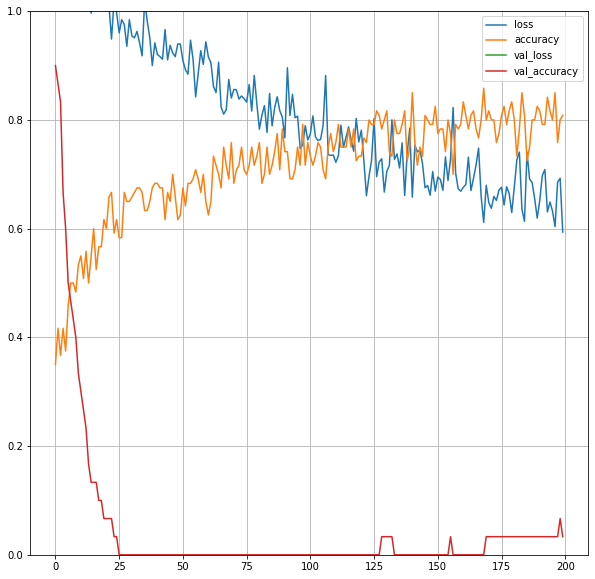

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#pd.DataFrame(history2.history).plot(figsize=(10,10))
#plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
#plt.show()